# Titanic: Exploratory Data Analysis

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

### Project Goal:
The goal of this project is simply to explore which factors may have influenced probability of survival. To do this, we'll work with a random subset of the full passenger population (specifically the [training set](https://www.kaggle.com/c/titanic/data?select=train.csv) as defined on Kaggle). We'll look at survival rates by individual feature segmentations (class, gender, age, etc.), as well as cross-sections of these features.

Note: before you draw any conclusions about the trends or factors we uncover in this exploratory analysis, I highly recommend further testing on the remaining passenger data (specifically the Kaggle [testing set](https://www.kaggle.com/c/titanic/data?select=test.csv)).

Let's get started by importing useful libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

Next, let's import our titanic data set and get a summary of the data with the .info() and .describe() methods.

In [2]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Let's try to figure out which factors may have influenced survival by looking at the following variables:

- Pclass (Passenger Class: first, second, or third)
- Sex (Male/Female)
- Age (0.4-80 years)
- SibSp (total number of siblings and spouses aboard)
- Parch (total number of parents and children aboard)
- Fare ($0 - $512)
- Embarked (location from which the passenger embarked: Southampton, Cherbourg, Queenstown)
- Survived (passenger survived (1) or not (0))

First, we'll visualize each of these variables separately to better understand our population demographics.

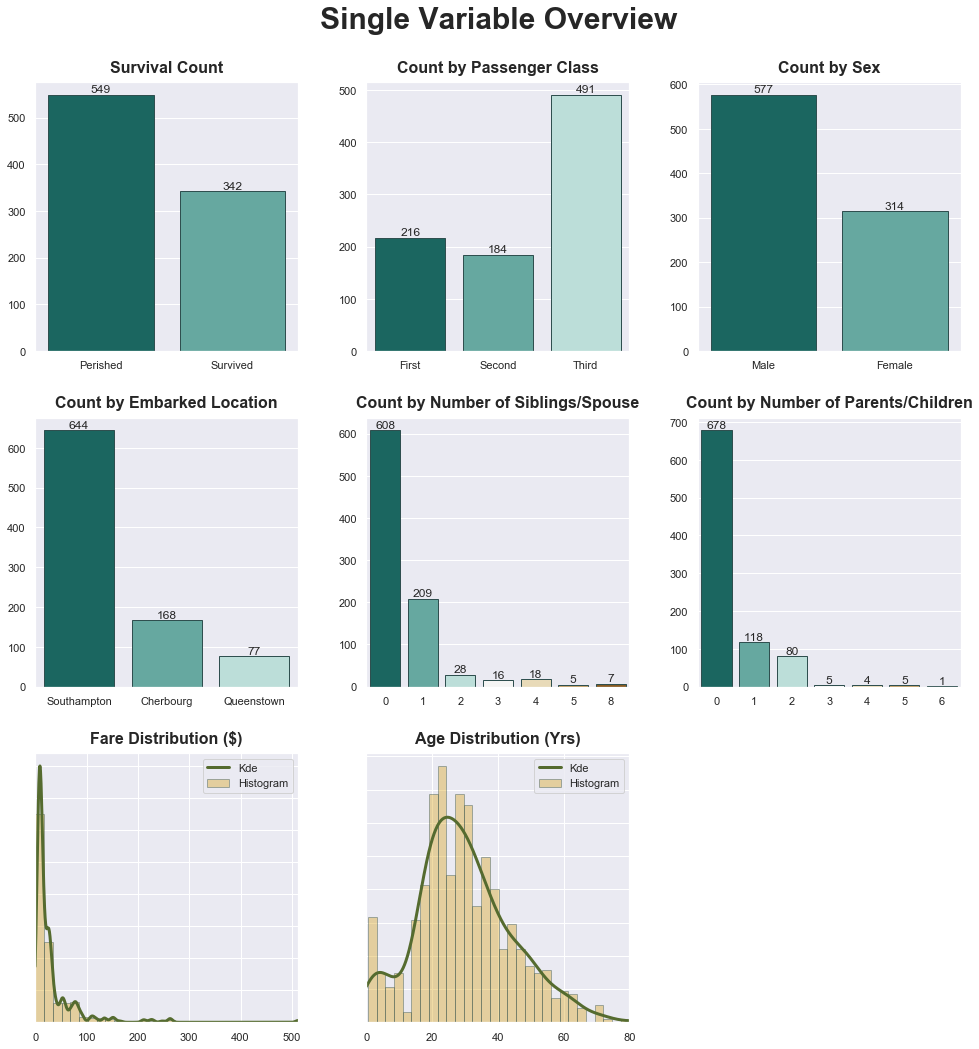

In [5]:
# Adding a Count column to make the analysis easier.
titanic['Count']=1

sns.set(style='darkgrid')
fig, axes = plt.subplots(3,3,figsize=(14,14))

titles = ['Survival Count','Count by Passenger Class','Count by Sex',
         'Count by Embarked Location', 'Count by Number of Siblings/Spouse', 'Count by Number of Parents/Children',
         'Fare Distribution ($)', 'Age Distribution (Yrs)', '']

var = ['Survived','Pclass','Sex','Embarked','SibSp','Parch','Fare','Age']

x_labels = [['Perished','Survived'], ['First','Second','Third'], ['Male','Female'], ['Southampton', 'Cherbourg', 'Queenstown']]

for i, ax in enumerate(axes.flatten()):
    if i in [0,1,2,3,4,5]:
        sns.countplot(titanic[var[i]],ax=ax,palette=sns.color_palette('BrBG_r', 7),
                      edgecolor='darkslategray')
        k=0
        j=[0,1,2,3,4,5,6]
        if i == 1:
            j=[1,2,0]
        elif i == 4:
            j=[0,1,2,4,3,6,5]
        elif i == 5:
            j=[0,1,2,3,5,4,6]
        for p in ax.patches:
            ax.text(p.get_x()+p.get_width()/2, p.get_height()+5,
                    titanic[var[i]].value_counts().iloc[j[k]], ha='center')
            k += 1
    if i in [6,7]:
        sns.distplot(titanic[var[i]],ax=ax, bins=30,
             kde_kws={'color':'darkolivegreen','label':'Kde','gridsize':1000,'linewidth':3},
             hist_kws={'color':'goldenrod','label':"Histogram",'edgecolor':'darkslategray'})
        ax.set_xlim([0, max(titanic[var[i]])])
        ax.set_yticklabels([])
    if i in [8]:
        ax.axis('off')
    if i in [0,1,2,3]:
        ax.set_xticklabels(x_labels[i])
    ax.set_title(label=titles[i], fontsize=16, fontweight='bold', pad=10)
    ax.set_xlabel(None)
    ax.set_ylabel(None)

fig.suptitle('Single Variable Overview', position=(.5,1.04), fontsize=30, fontweight='bold')
fig.tight_layout(h_pad=2)

### Remove Outliers
It looks like we may have some pretty extreme outliers with Fare around $500. To better determine if these values are indeed anomalous, let's see how many there are, the boxplot, and their Z-scores:

In [6]:
titanic['Fare'].sort_values(ascending=False).head()

679    512.3292
258    512.3292
737    512.3292
341    263.0000
438    263.0000
Name: Fare, dtype: float64

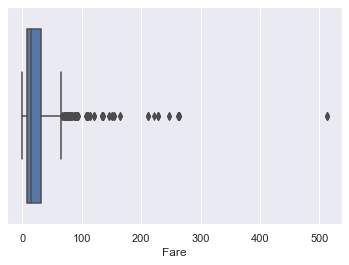

In [7]:
sns.boxplot(y=titanic['Fare'],data=titanic,orient='h')

In [8]:
print ('$512 fare has Z-score = '+str(stats.zscore(titanic['Fare'])[258]))

val = 512.3292
third_qrt = titanic['Fare'].quantile(.5)
iqr = stats.iqr(titanic['Fare'])

print('$512 fare is '+str((val - third_qrt)/iqr)+' IQRs above the third quartile')

$512 fare has Z-score = 9.667166525013505
$512 fare is 21.56273820248077 IQRs above the third quartile


These three passengers with $512 tickets have fares almost 10 standard deviations above the mean and exceed the third quartile by over 20 IQRs. This gives us the confidence we need to assume these data points are indeed outliers. Let's go ahead and drop them.

In [9]:
titanic = titanic[titanic['Fare']<500]

# Initial Exploration of Survival Rates

Let's begin by looking at survival rates by each variable individually.

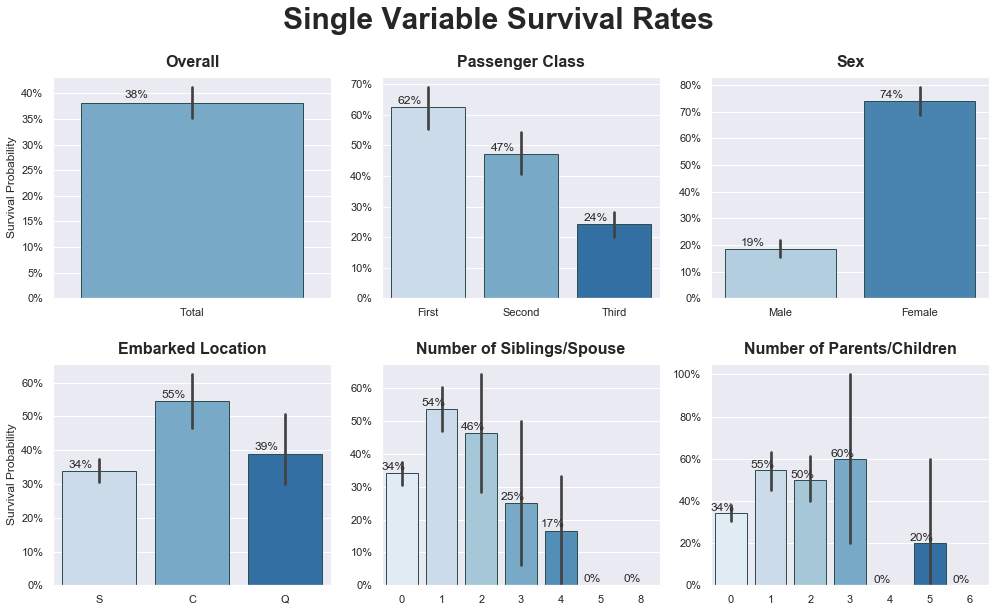

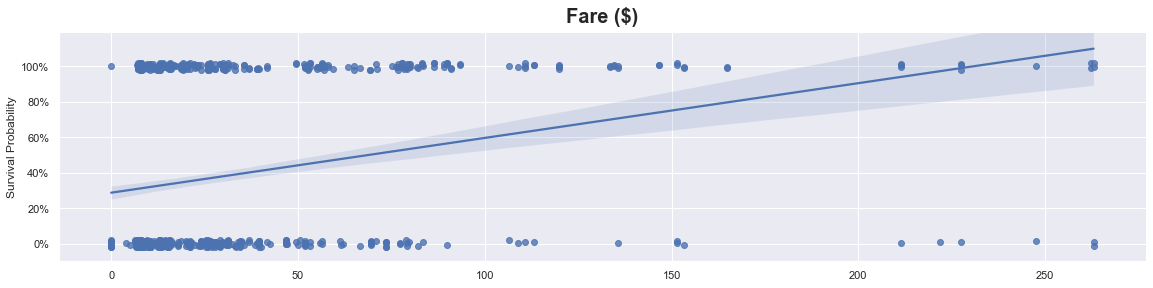

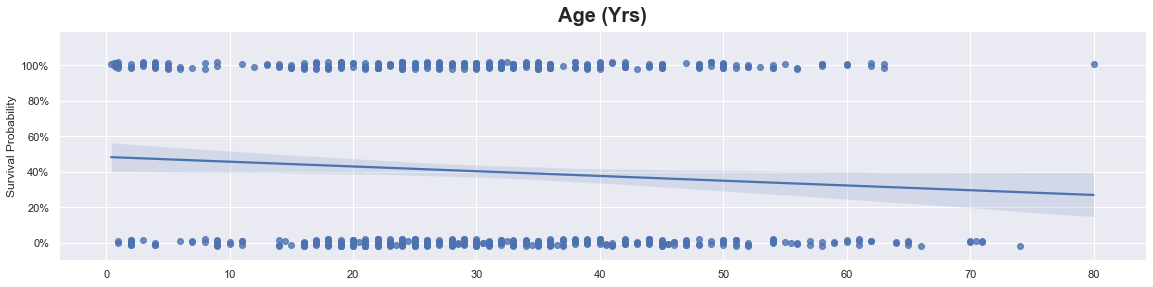

In [10]:
fig = plt.figure(figsize=(14,8))
g = fig.add_gridspec(2,6)
ax1 = fig.add_subplot(g[0, :2])
ax2 = fig.add_subplot(g[0, 2:4])
ax3 = fig.add_subplot(g[0, 4:])
ax4 = fig.add_subplot(g[1, :2])
ax5 = fig.add_subplot(g[1, 2:4])
ax6 = fig.add_subplot(g[1, 4:])

axes = [ax1,ax2,ax3,ax4,ax5,ax6]

titles = ['Overall', 'Passenger Class', 'Sex', 'Embarked Location', 'Number of Siblings/Spouse',
         'Number of Parents/Children', 'Fare ($)', 'Age (Yrs)']

var = ['Count', 'Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch', 'Fare', 'Age']

x_labels = [['Total'],['First', 'Second', 'Third'], ['Male', 'Female'], ['Southampton', 'Cherbourg', 'Queenstown']]

def to_percent(y,position):
    return str(str(int(round(y*100,0)))+"%")

for i, ax in enumerate(axes):
    sns.barplot(x=var[i], y='Survived', data=titanic,palette='Blues',
                ax=ax,edgecolor='darkslategray')
    ax.set_ylabel('Survival Probability')
    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(to_percent))
    ax.set_xlabel(None)
    if i in [1,2,4,5]:
        ax.set_ylabel(None)
    ax.set_title(label=titles[i], fontsize=16, fontweight='bold', pad=10)
    j=0
    for p in ax.patches:
        ax.text(p.get_x()+p.get_width()*.25, p.get_height()+.01,
                '{0:.0%}'.format(p.get_height()), ha='center')
        j += 1
    if i in [0,1,2]:
        ax.set_xticklabels(x_labels[i])

for i in [6,7]:
    sns.lmplot(var[i], 'Survived', titanic, height=4, aspect=4, y_jitter=.02)
    h = plt.gca()
    h.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(to_percent))
    h.set(xlabel=None,ylabel='Survival Probability',ylim=(-0.1,1.19))
    h.set_title(label=titles[i], fontsize=20, fontweight='bold', pad=10)

fig.suptitle('Single Variable Survival Rates', position=(.5,1.06), fontsize=30, fontweight='bold')
fig.tight_layout(h_pad=2)

### Single Variable Insights
<u>**Pclass:**</u> Probability of survival appears to decrease as we move from first to third class. Note not only the decrease in observed rates (62% -> 47% -> 24%), but also the almost complete lack of overlap of the 95% confidence interval bars (ci bars); we can be pretty confident that probability of survival drops from first to second class, and we can be even more confident it drops from second to third.

<u>**Sex:**</u> We can be very confident males have a lower probability of survival than females. The difference in observed survival rates is stark (74% vs 19%), and the ci bars are worlds apart.

<u>**Embarked Location:**</u> Given the size of the ci bar overlap, passengers from Cherbourg, France (55%) appear to have had a higher probability of survival than passengers from Southampton, USA (34%), and it seems somewhat likely Cherbourg passengers had a higher probability of survival than passengers from Queenstown, Australia (39%) as well. We need more data to be confident Queenstown passengers had a higher survival probability than Southampton passengers, despite the results trending in that direction. 

<u>**Number of Siblings/Spouse:**</u> We can have confidence that probability of survival was higher when a passenger has one sibling/spouse (54%) vs none (34%). But as the number of siblings/spouse increases beyond one, we begin to see a rapid decline in survival rate. Note, however, that few passengers (<10%) have more than 1 sibling/spouse, so our confidence in actual survival probability for these groups is low.

<u>**Number of Parents/Children:**</u> As with sibling/spouse count, we can have confidence that probability of survival was higher when a passenger had one parent/child (55%) vs none (34%). However, it's hard to say how survival probability  changed when a passenger had more than one parent/child - the observed survival rates are fairly meaningless given the large ci. Once again, few passengers (<10%) had more than one parent/child onboard.

<u>**Fare:**</u> There is a clear positive correlation between fare and survival rate. Given the strong positive slope throughout the ci band, we can have confidence that in general probability of survival increased with fare.

<u>**Age:**</u> There is a fairly clear, yet moderate, negative correlation between age and survival rate. Note that the ci band does allow for an almost flat line, but taking into consideration the upward pull of that debatable outlier at 80 yrs, we can feel fairly confident that probability of survival moderately decreased with age overall. This is definitely a trend we would want to test further to confirm.

# Sex

Given the significant and clear difference between Male and Female rates of survival, let's start with the Sex variable for further investigation.

Before we go further, let's first see if the difference in survival rates between sexes holds for children (<17 yrs).

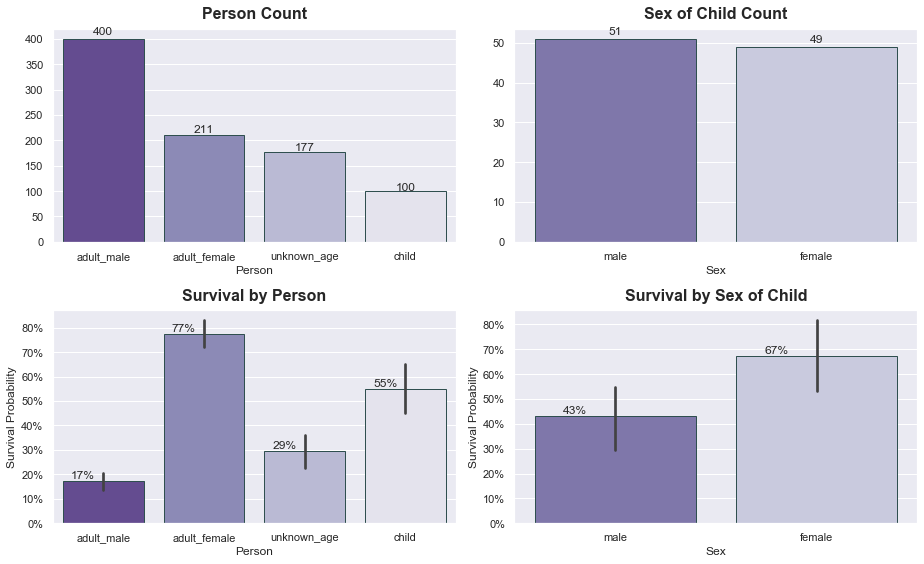

In [11]:
#Add Person column, identifying man, woman, or child
def person(passenger):
    age, sex = passenger
    if np.math.isnan(age):
        return 'unknown_age'
    elif age<17:
        return 'child'
    else:        
        if sex == 'male':
            return 'adult_male'
        else:
            return 'adult_female'

titanic['Person'] = titanic[['Age','Sex']].apply(person, axis=1)

#Plot Person/Sex counts and survival rates
fig, axes = plt.subplots(2,2,figsize=[13,8])
titles = ['Person Count','Sex of Child Count','Survival by Person','Survival by Sex of Child']
var = ['Person','Sex','Person','Sex']

for i, ax in enumerate(axes.flatten()):
    if i in [1,3]: 
        df = titanic[titanic['Person']=='child']
    else: 
        df = titanic
    if i in [0,1]:
        sns.countplot(x=var[i], data=df, palette='Purples_r', edgecolor='darkslategray', ax = ax)
        j=0
        for p in ax.patches:
            ax.text(p.get_x()+p.get_width()/2, p.get_height()*1.02,
                    df[var[i]].value_counts().iloc[j], ha='center')
            j += 1
        ax.set_title(label=titles[i], fontsize=16, fontweight='bold', pad=10)
        ax.set_ylabel(None)
    if i in [2,3]:
        sns.barplot(x=var[i], y='Survived', data=df,palette='Purples_r',
                        ax=ax,edgecolor='darkslategray')
        ax.set_ylabel('Survival Probability')
        ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(to_percent))
        ax.set_title(label=titles[i], fontsize=16, fontweight='bold', pad=10)
        j=0
        for p in ax.patches:
            ax.text(p.get_x()+p.get_width()*.25, p.get_height()+.01,
                    '{0:.0%}'.format(p.get_height()), ha='center')
            j += 1

fig.tight_layout()

Given 177 of the 891 samples have unknown (null) age, we'll treat this group separately in our newly-defined "Person" variable.

Interestingly, while child survival rates are still lower for males than females, the difference is much less significant than in the adult population. It would appear a child's probability of survival was more equitable on the basis of sex than for adults.

Let's think of children as their own separate group moving forward.

# Person (Sex 2.0)
Let's proceed with our investigation of how survival varied by sex by looking at adult males, adult females, and children separately.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

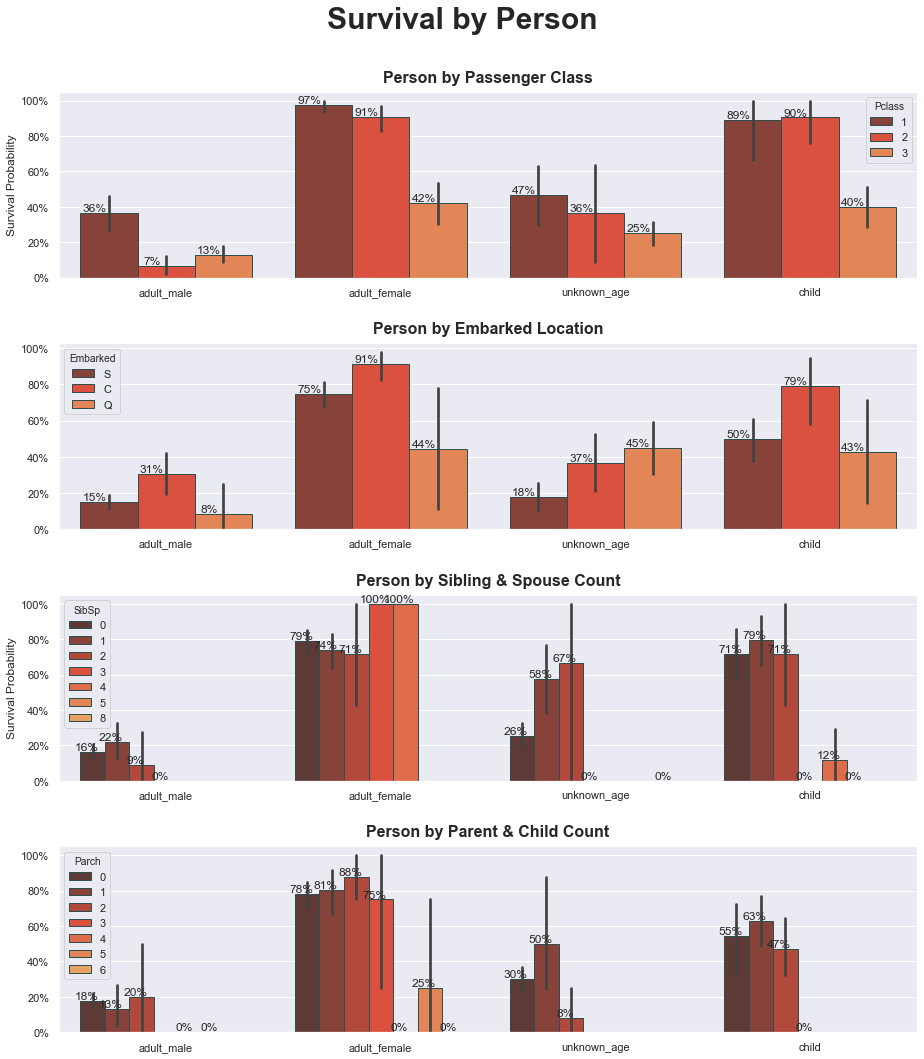

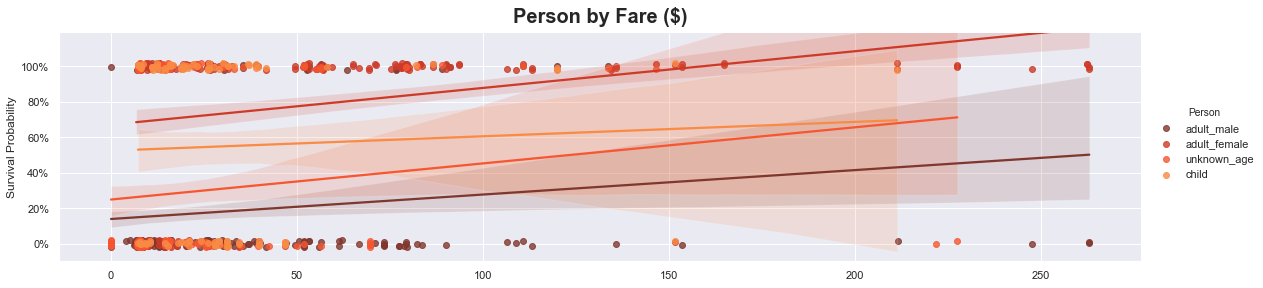

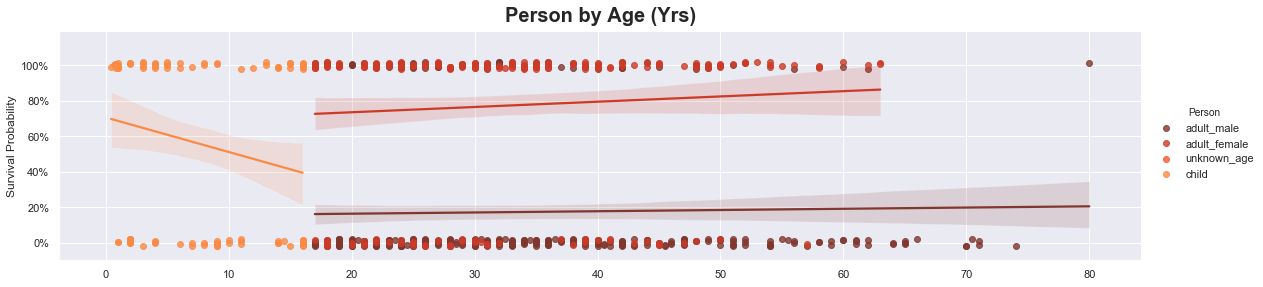

In [12]:
fig = plt.figure(figsize=(13,14))
g = fig.add_gridspec(4,1)
ax1 = fig.add_subplot(g[0, :])
ax2 = fig.add_subplot(g[1, :])
ax3 = fig.add_subplot(g[2, :])
ax4 = fig.add_subplot(g[3, :])

axes = [ax1,ax2,ax3,ax4]

titles = ['Person by Passenger Class','Person by Embarked Location', 'Person by Sibling & Spouse Count',
         'Person by Parent & Child Count', 'Person by Fare ($)', 'Person by Age (Yrs)']

var = ['Pclass','Embarked','SibSp','Parch','Fare','Age']

for i, ax in enumerate(axes):
    sns.barplot(x='Person', y='Survived', data=titanic, palette='YlOrRd_d', ax=ax, edgecolor='darkslategray', hue=var[i])
    ax.set_ylabel('Survival Probability')
    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(to_percent))
    ax.set_title(label=titles[i], fontsize=16, fontweight='bold', pad=10)
    ax.set_xlabel(None)
    if i in [1,3]:
        ax.set_ylabel(None)
    j=0
    for p in ax.patches:
        ax.text(p.get_x()+p.get_width()*.25, p.get_height()+.01,
                '{0:.0%}'.format(p.get_height()), ha='center')
        j += 1

for i in [4,5]:
    sns.lmplot(var[i], 'Survived', titanic, height=4, aspect=4, y_jitter=.02,hue='Person', palette='YlOrRd_d')
    h = plt.gca()
    h.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(to_percent))
    h.set(xlabel=None,ylabel='Survival Probability',ylim=(-0.1,1.19))
    h.set_title(label=titles[i],fontsize=20, fontweight='bold', pad=10)

fig.suptitle('Survival by Person', position=(.5,1.05), fontsize=30, fontweight='bold')
fig.tight_layout(h_pad=2)

# Person Insights
<u>**Pclass:**</u> Interestingly, adult females and children saw a significant decline in survival rate between second and third class. **Based on these observations, we can say with confidence that the probability of survival for adult females & children in first & second class was higher than for other groups (e.g. third class & male passengers). While this observation holds with the [Women and Children First Policy](https://en.wikipedia.org/wiki/Women_and_children_first) of the time, adult females & children in third class appear to have been treated differently.**

<u>**Embarked:**</u> Cherbourg saw the highest survival rates and Queenstown saw the lowest across adults males, adult females, and children. It's not immediately clear why this might have been, we'll investigate this trend further.

<u>**Sibling/Spouse and Parent/Child:**</u> There don't appear to be any meaningful trends in either variable. It seems part of the problem could be that we are trying to divide our population up into too many buckets to determine anything significant. Moving forward, we'll consolidate the information in these two variables into one that simply designates whether a passenger was traveling **Alone** or **With Family**.

<u>**Fare:**</u> adult males, adult females, children, and unknown_age all exhibit similar positive correlations between fare and survival rate.

<u>**Age:**</u> Interestingly, child survival rate is negatively correlated with age, while both adult male and adult female survival rates are slightly positively correlated with age. Note, however, that confidence bands for all three groups allow for no correlation, and removing the 80-year-old may result in a flat-to-negative correlation for adult males. Later, we'll look at survival rates by age range (e.g. in 10 year buckets).

#### Quick Detour: Confirm fares decline as passenger class increases

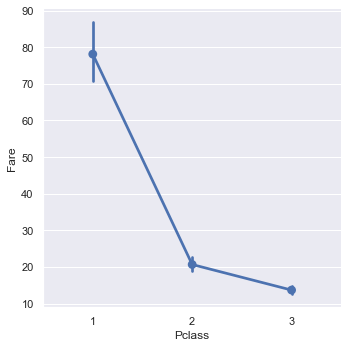

In [13]:
sns.catplot(x='Pclass', y='Fare', data=titanic, kind='point')

Confirmed. Interesting how similar second and third class fares are in comparison to first class.

## Cherbourg
Given Cherbourg saw the highest survival rates and Queenstown the lowest across adult males, adult females, and children, let's investigate further if passenger class might have had something to do with it.

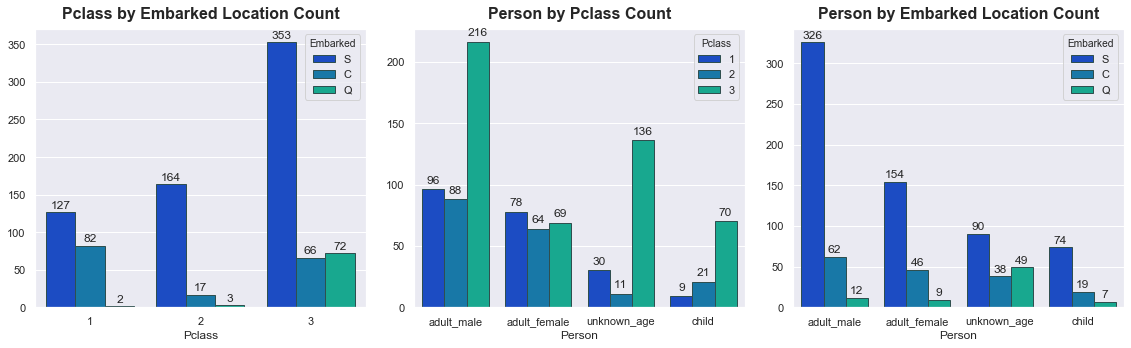

In [14]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16,5))


#Plot Pclass by Embarked Location Count
sns.countplot(x='Pclass',data=titanic,palette='winter', hue='Embarked',edgecolor='darkslategray', ax=ax1)
embrk = ['S','C','Q','S','C','Q','S','C','Q']
pclass = [1,2,3,1,2,3,1,2,3]
i=0
j=[0,0,0,1,1,2,2,2,1]
for p in ax1.patches:
    ax1.text(p.get_x()+p.get_width()/2, p.get_height()+5,
            titanic[titanic['Pclass']==pclass[i]]['Embarked'].value_counts().iloc[j[i]], ha='center')
    i += 1
ax1.set(ylabel=None)
ax1.set_title(label='Pclass by Embarked Location Count', fontsize=16, fontweight='bold', pad=10)

#Plot Person by Pclass Count
sns.countplot(x='Person',data=titanic,palette='winter', hue='Pclass',edgecolor='darkslategray',ax=ax2)
pclass = [1,2,3,1,2,3,1,2,3,1,2,3]
person = ['adult_male','adult_female','unknown_age','child','adult_male','adult_female','unknown_age','child',
         'adult_male','adult_female','unknown_age','child','adult_male','adult_female','unknown_age','child']
i=0
j=[1,0,1,2,2,2,2,1,0,1,0,0]
for p in ax2.patches:
    ax2.text(p.get_x()+p.get_width()/2, p.get_height()+5,
            titanic[titanic['Person']==person[i]]['Pclass'].value_counts().iloc[j[i]], ha='center')
    i += 1
ax2.set(ylabel=None)
ax2.set_title(label='Person by Pclass Count', fontsize=16, fontweight='bold', pad=10)

#Plot Count of Person by Embarked Location
sns.countplot(x='Person',data=titanic,palette='winter', hue='Embarked',edgecolor='darkslategray',ax=ax3)
embrk = ['S','C','Q','S','C','Q','S','C','Q','S','C','Q']
person = ['adult_male','adult_female','unknown_age','child','adult_male','adult_female','unknown_age','child',
         'adult_male','adult_female','unknown_age','child','adult_male','adult_female','unknown_age','child']
i=0
j=[0,0,0,0,1,1,2,1,2,2,1,2]
for p in ax3.patches:
    ax3.text(p.get_x()+p.get_width()/2, p.get_height()+5,
            titanic[titanic['Person']==person[i]]['Embarked'].value_counts().iloc[j[i]], ha='center')
    i += 1
ax3.set(ylabel=None)
ax3.set_title(label='Person by Embarked Location Count', fontsize=16, fontweight='bold', pad=10)

plt.tight_layout()

Awesome! Per the first graph, Cherbourg saw a higher share of passengers in first class than either Queenstown or Southampton, which could help explain the higher survival rate. Additionally, Queenstown is almost entirely third class (72 out of 77, 94%), which could help explain why it had the lowest survival rates across adult males, adult females, and children.

#### A few additional observations:
Per the second graph, a much lower portion of adult females were in third class than for any other cohort.

Per the third graph, we see that a disproportionately high share of Queenstown passengers have unknown age.

# With Family vs. Alone
Let's see if we can find any trends combining the SibSp and Parch fields to represent if someone was alone or with family.

In [15]:
titanic['Accompanied'] = titanic['SibSp']+titanic['Parch']
titanic['Accompanied'] = np.where(titanic['Accompanied']>0, 'With Family', 'Alone')

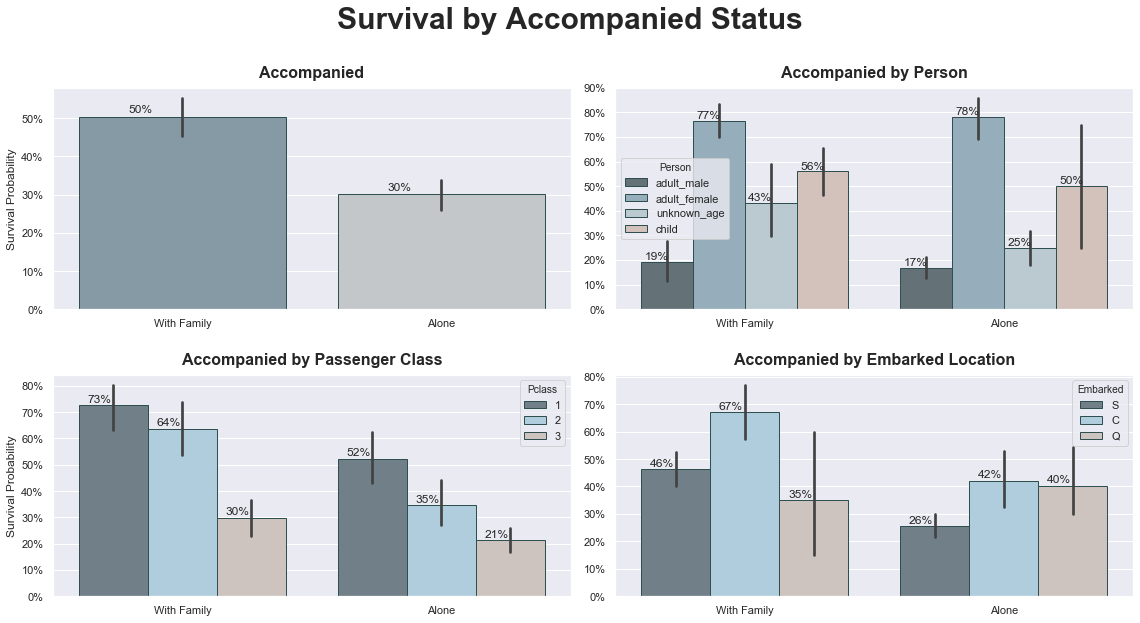

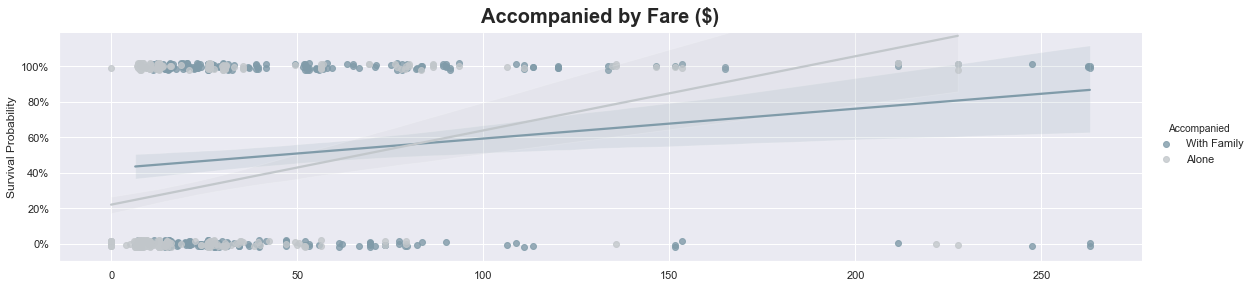

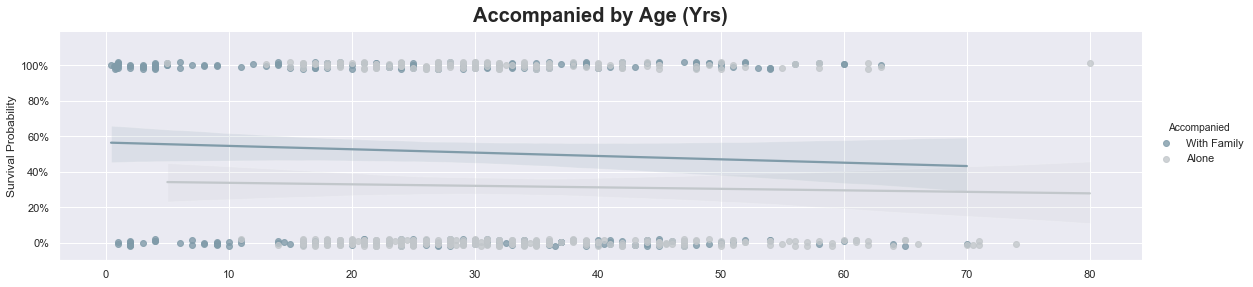

In [16]:
fig = plt.figure(figsize=(16, 8))
g = fig.add_gridspec(2,8)
ax1 = fig.add_subplot(g[0, :4])
ax2 = fig.add_subplot(g[0, 4:])
ax3 = fig.add_subplot(g[1, :4])
ax4 = fig.add_subplot(g[1, 4:])

axes = [ax1,ax2,ax3,ax4]

titles = ['Accompanied','Accompanied by Person','Accompanied by Passenger Class','Accompanied by Embarked Location',
          'Accompanied by Fare ($)', 'Accompanied by Age (Yrs)']

var = [None,'Person','Pclass','Embarked','Fare','Age']

for i, ax in enumerate(axes):
    sns.barplot(x='Accompanied', y='Survived', data=titanic, palette='RdBu_d', ax=ax, edgecolor='darkslategray', hue=var[i])
    ax.set_ylabel('Survival Probability')
    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(to_percent))
    ax.set_title(label=titles[i], fontsize=16, fontweight='bold', pad=10)
    ax.set_xlabel(None)
    if i in [1,3]:
        ax.set_ylabel(None)
    j=0
    for p in ax.patches:
        ax.text(p.get_x()+p.get_width()*.3, p.get_height()+.01,
                '{0:.0%}'.format(p.get_height()), ha='center')
        j += 1

for i in [4,5]:
    sns.lmplot(var[i], 'Survived', titanic, height=4, aspect=4, y_jitter=.02,hue='Accompanied', palette='RdBu_d')
    h = plt.gca()
    h.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(to_percent))
    h.set(xlabel=None,ylabel='Survival Probability',ylim=(-0.1,1.19))
    h.set_title(label=titles[i],fontsize=20, fontweight='bold', pad=10)

fig.suptitle('Survival by Accompanied Status', position=(.5,1.08), fontsize=30, fontweight='bold')
fig.tight_layout(h_pad=2)

### Accompanied Status Insights
Survival rates were higher when traveling with family (50%) vs not (30%). Given the distinct separation in ci bars in the first graph, we can have confidence probability of survival was higher for passengers with family aboard. We see this trend holds across passenger class, adult men, adult women, children, Southampton & Cherbourg cohorts.

Interestingly, we see a stronger positive correlation between survival rate and fare for passengers traveling alone than for passengers traveling with family.

## Survival by Age Range
Let's see how survival rate varies by age range.

Text(0.5, 1, 'Survival by Age Range by Sex')

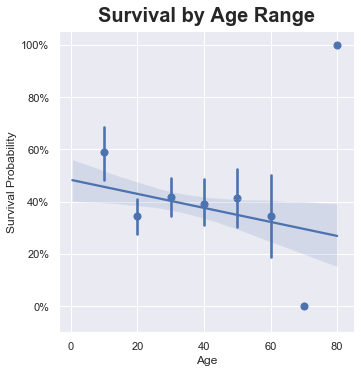

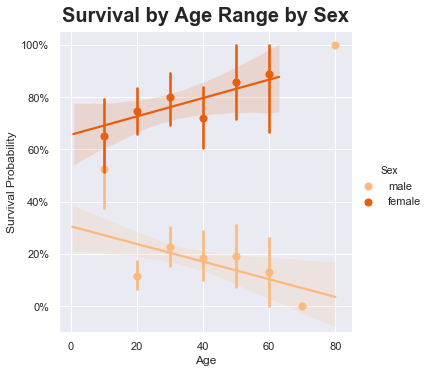

In [17]:
age_buckets = [10,20,30,40,50,60,70,80]

sns.lmplot('Age','Survived',data=titanic,x_bins=age_buckets)
h = plt.gca()
h.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(to_percent))
h.set(ylabel='Survival Probability',ylim=(-0.1,1.05))
h.set_title(label='Survival by Age Range',fontsize=20, fontweight='bold', pad=10)

sns.lmplot('Age','Survived',hue='Sex',data=titanic,palette='Oranges',x_bins=age_buckets)
h = plt.gca()
h.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(to_percent))
h.set(ylabel='Survival Probability',ylim=(-0.1,1.05))
h.set_title(label='Survival by Age Range by Sex',fontsize=20, fontweight='bold', pad=10)

Very cool -- while survival rate was roughly the same for 15-65 year olds, females appear to exhibit more of a positive correlation, and males appear to exhibit a negative correlation.

# Key Trends & Takeaways
**We are confident that females and children in first and second class had a higher probability of survival than the remaining population.**

<u>**Pclass:**</u> Probability of survival appeared to decrease with passenger class for most cohorts: overall, adult females, adult males, and children (note, we only saw a **general** downward trend for these last two groups).

<u>**Sex:**</u> We are confident that females had a significantly higher probability of survival than males. This trend held for adults, and to a lesser degree children. For adults, this trend held regardless of passenger class, embarked location, parent/child count, and sibling/spouse count.

<u>**Age:**</u> We saw a general downward trend in probability of survival overall with increased age. This trend held for both children and males, but interestingly females saw a positive correlation between age and probability of survival.

<u>**Family (SibSp/Parch):**</u> Overall, we can have confidence that probability of survival increased when a family member was onboard.

<u>**Fare:**</u> In general, we can have confidence that probability of survival increased with fare. We see this trend hold across each of the following cohorts: alone, with family, adult males, adult females, and children. We confirmed that fare declines as passenger class increases, which could help explain the positive trend in survival.

<u>**Embarked:**</u> Overall, survival rate was highest for Cherbourg passengers and lowest for Queenstown passengers. This held for each of the adult male, adult female, and child cohorts.

## Appendix

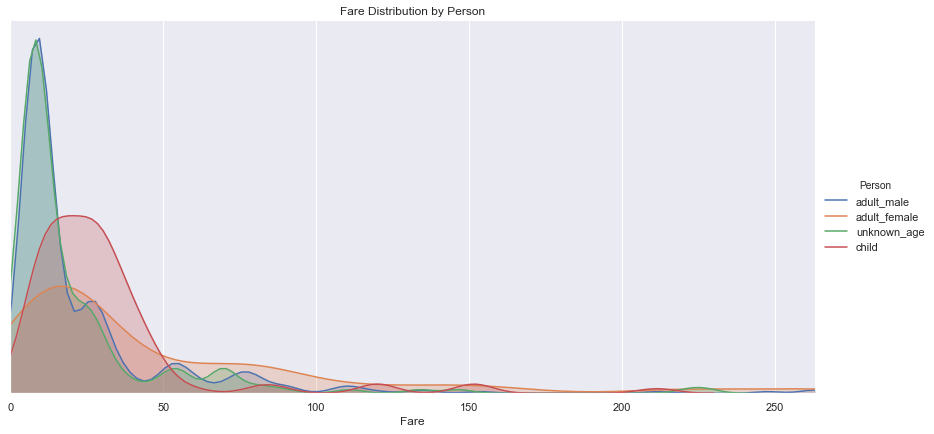

In [18]:
fig = sns.FacetGrid(titanic, hue='Person', aspect=2, height=6)
fig.map(sns.kdeplot,'Fare',shade=True)
fig.set(xlim=(0,titanic['Fare'].max()),yticks=[],title='Fare Distribution by Person')
fig.add_legend()

Interesting, it appears that adult male and unknown_age passengers paid significantly less for tickets. While children and adult female passengers paid more, adult females continue to have a sizable share above $50.

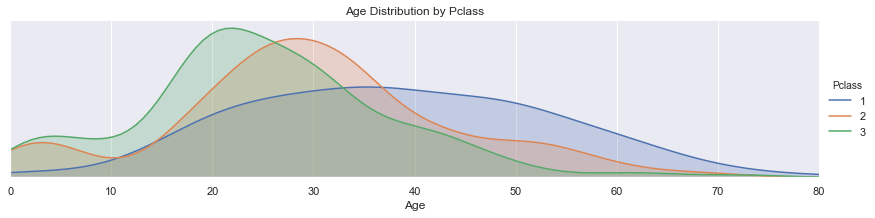

In [19]:
fig = sns.FacetGrid(titanic, hue='Pclass', aspect=4, height=3)
fig.map(sns.kdeplot,'Age',shade=True)
fig.set(xlim=(0,titanic['Age'].max()),yticks=[],title='Age Distribution by Pclass')
fig.add_legend()

Third class saw a much higher proportion of young passengers, while first class saw a much higher proportion of middle-age to older passengers.

Let's investigate the cabin variable a bit further:

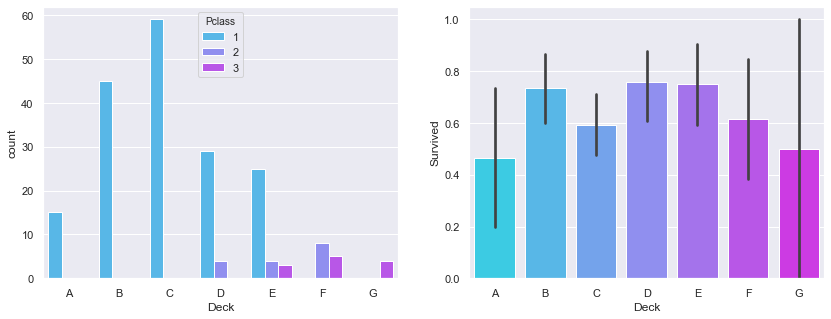

In [20]:
deck_df = pd.DataFrame(titanic['Cabin'].dropna(), columns = ['Cabin'])
deck_df['Deck'] = deck_df['Cabin'].apply(lambda x: str(x)[0])
deck_df = pd.DataFrame.join(titanic[['Pclass','Person','Survived']],deck_df,how='right')

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='Deck',data=deck_df,hue='Pclass',order=['A','B','C','D','E','F','G'],palette='cool',ax=ax1)
sns.barplot(x='Deck',y='Survived',data=deck_df,order=['A','B','C','D','E','F','G'],palette='cool',ax=ax2)

Interesting... first class passnegers occupied decks A, B, C exclusively.